# Aprendizado supervisionado

## Definição do problema

Os dados utilizados nesse projeto referem-se a informações fornecidas por clientes solicitantes de empréstimos à empresa [Lending Club](https://www.lendingclub.com) para o período de tempo de 2007 a 2011. Os atributos usamos neste problema estão relacionados a alguns detalhes do pedido de empréstimo, como valor do empréstimo solicitado para o mutuário, pagamento mensal a ser feito pelo mutuário se o empréstimo for aceito, renda anual do mutuário, número de incidências de inadimplência na carteira de crédito do tomador, taxa de juros do empréstimo, entre outros.

Deseja-se de prever empréstimos aceitos sem sucesso. Um pedido de empréstimo não é bem-sucedido se o valor financiado (`funded_amnt`) ou o valor financiado por investidores (`funded_amnt_inv`) fica muito aquém do valor do empréstimo solicitado (`loan_amnt`). O ponto de corte adotado é dado pela relação

$$\dfrac{loan - funded}{loan} \geq 0.95$$

## Leitura dos dados

Bibliotecas importadas:

In [110]:
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm
from sklearn import  neighbors
from sklearn import datasets 
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [3]:
plt.style.use('bmh')

In [5]:
ofname = open('../data/dataset_small.pkl', 'rb')
# x armazena os dados de entrada e y armazena os dados de destino (target data)
(x, y) = pickle.load(ofname, encoding='latin1')

- Os dados de entreda estão estruturados em um _array_ Numpy.

Matriz de dados de entrada:
$
    \mathbf{X} = 
    \begin{bmatrix}
        x_{11} & x_{12} & \cdots & x_{1d} \\
        x_{21} & x_{22} & \cdots & x_{2d} \\
        \vdots & \vdots & \ddots & \vdots \\
        x_{n1} & x_{n2} & \cdots & x_{nd} \\
    \end{bmatrix}
$

Vetor de dados de destino:
$
    \mathbf{y}^T = 
    \begin{bmatrix}
        y_1, & y_2, & \cdots, & y_n
    \end{bmatrix}
$.

- As colunas de $\mathbf{X}$ são denominadas atributos, dimensões, regressores, covarientes, preditores ou variáveis independentes;
- As linhas correspondem às instâncias ou observações;
- o destino (_target_) é a saída, resposta ou variável dependente.


In [12]:
dims = x.shape[1]
N = x.shape[0]
print(f"""
    {'Dimensão dos dados:':<25s} {dims:>4d}
    {'Número de observações:':<25s} {N:>4d}
""")


    Dimensão dos dados:         15
    Número de observações:    4140



### Aplicação do modelo de aprendizado supervisionado

1. Criação de uma instância do classificador k vizinhos mais próximos (KNN, "K-Nearest Neighbors")

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=11)

2. Treinamento do classificador

In [15]:
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=11)

3. Calculo da previsão de acordo com o modelo

In [16]:
yhat = knn.predict(x)

4. Checagem do resultado por observação de algumas amostras

In [25]:
head = f"{'i':4s} {'Valor Predito':>15s} {'Valor real':>10s}"
print("=" * len(head))
print(head)
print("-" * len(head))
n = 10
acertos = 0
for i in np.random.choice(N, n):
    if yhat[i] == y[i]:
        acertos += 1
    print(f"{i:>4d} {yhat[i]:15.1f} {y[i]:10.1f}")
print("=" * len(head))
print(f"Acurácia: {100 * knn.score(x, y):>.2f}%")
    

i      Valor Predito Valor real
-------------------------------
3300            -1.0       -1.0
3147            -1.0       -1.0
3484            -1.0       -1.0
2055            -1.0       -1.0
3974            -1.0       -1.0
1920            -1.0       -1.0
 288            -1.0        1.0
2862            -1.0       -1.0
 846            -1.0       -1.0
  84            -1.0        1.0
Acurácia: 83.16%


Visualização gráfica

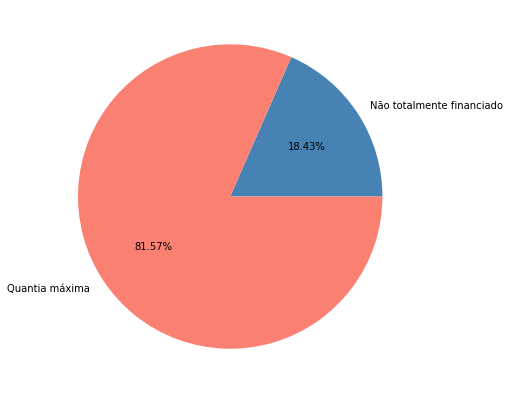

In [34]:
plt.subplots(figsize=(8,6))
plt.pie(
    np.c_[np.sum(np.where(y == 1, 1, 0)),
    np.sum(np.where(y == -1, 1, 0))][0],
    labels = ['Não totalmente financiado', 'Quantia máxima'],
    colors = ['steelblue', 'salmon'], shadow=False,
    autopct = '%.2f%%')

plt.gcf().set_size_inches((7,7))
plt.show()

Matriz de confusão

In [35]:
yhat = knn.predict(x)
TP = np.sum(np.logical_and(yhat == -1, y == -1))
TN = np.sum(np.logical_and(yhat == 1, y == 1))
FP = np.sum(np.logical_and(yhat == -1, y == 1))
FN = np.sum(np.logical_and(yhat == 1, y == -1))

print(f"""
    TP: {TP:>4d} FP: {FP:>4d}
    FN: {FN:>4d} TN: {TN:>4d}
""")


    TP: 3370 FP:  690
    FN:    7 TN:   73



In [37]:
metrics.confusion_matrix(yhat, y)

array([[3370,  690],
       [   7,   73]])

## Aplicação do modelo com divisão dos dados em _treinamento_ e _teste_

Vamos dividir o conjunto de dados em dois subconjuntos. O primeiro para treinamento, correspondendo a 70% dos dados, escolhidos aleatoriamente e o restante para teste do modelo.

In [38]:
perm = np.random.permutation(y.size)
PRC = 0.7
split_point = int(np.ceil(y.shape[0] * PRC))

X_train = x[perm[:split_point].ravel(), :]
y_train = y[perm[:split_point].ravel()]

X_test = x[perm[split_point:].ravel(), :]
y_test = y[perm[split_point:].ravel()]


In [47]:
print(f"""
    {'Training shape:':15s} {X_train.shape}, {'Training targets shape:':23s} {y_train.shape}
    {'Testing shape:':15s} {X_test.shape}, {'Testing targets shape:':23s} {y_test.shape}
""")


    Training shape: (2898, 15), Training targets shape: (2898,)
    Testing shape:  (1242, 15), Testing targets shape:  (1242,)



### Aplicação do modelo

In [68]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
yhat = knn.predict(X_train)

In [69]:
acc = metrics.accuracy_score(yhat, y_train)
confusion_matrix = metrics.confusion_matrix(y_train, yhat)
print(f"""
    ESTATÍSTICAS DE TREINAMENTO
    Acurácia da classificação: {100 * acc:.2f}%
    Matriz de confusão:
""")

for i in range(2):
    print(f"\t|{confusion_matrix[i][0]:>4d} {confusion_matrix[i][1]:>4d}|")


    ESTATÍSTICAS DE TREINAMENTO
    Acurácia da classificação: 100.00%
    Matriz de confusão:

	|2385    0|
	|   0  513|


Checagem com os dados de teste

In [70]:
yhat_chk = knn.predict(X_test)
acc_chk = metrics.accuracy_score(yhat_chk, y_test)
confusion_matrix_chk = metrics.confusion_matrix(y_test, yhat_chk)
print(f"""
    ESTATÍSTICAS DE TREINAMENTO
    Acurácia da classificação: {100 * acc_chk:.4f}%
    Matriz de confusão:
""")

for i in range(2):
    print(f"\t|{confusion_matrix_chk[i][0]:>4d} {confusion_matrix_chk[i][1]:>4d}|")



    ESTATÍSTICAS DE TREINAMENTO
    Acurácia da classificação: 74.1546%
    Matriz de confusão:

	| 847  145|
	| 176   74|


In [95]:
PRC = 0.3
n = 100
K = np.arange(1,16)
ACC = np.zeros(len(K))
for k in K:
    acc = np.zeros((n, ))
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=PRC)
        knn = neighbors.KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        yhat = knn.predict(X_test)
        acc[i] = metrics.accuracy_score(yhat, y_test)


    acc_mean = acc.mean()
    acc_std = acc.std()
    ACC[k-1] = acc_mean
    if k >= len(K) - 5:
        print(f"Acurácia média (k = {k:>2d}): ({100 * acc_mean:.4f} +/- {100 * acc_std:.4f})%")


Acurácia média (k = 10): (82.1490 +/- 0.9628)%
Acurácia média (k = 11): (81.9203 +/- 0.9881)%
Acurácia média (k = 12): (82.2488 +/- 0.9098)%
Acurácia média (k = 13): (82.0604 +/- 0.9919)%
Acurácia média (k = 14): (81.8881 +/- 0.8921)%
Acurácia média (k = 15): (81.9638 +/- 0.9694)%


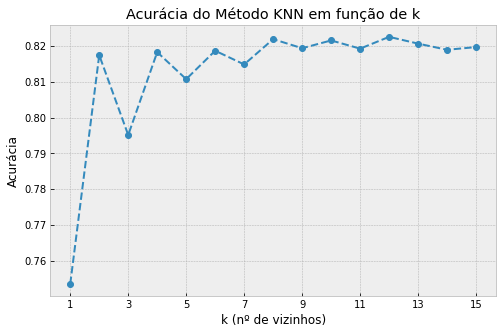

In [109]:
plt.subplots(figsize=(8, 5))
plt.plot(K, ACC, 'o--')
plt.xlabel('k (nº de vizinhos)')
plt.ylabel('Acurácia')
plt.title('Acurácia do Método KNN em função de k')
plt.xticks(range(1,16, 2))
plt.show()

## Comparação entre modelos de treinamento

In [114]:
PRC = 0.1
n = 10
acc_r = np.zeros((n, 4))
for i in range(n):
    X_train, X_test,  y_train, y_test = train_test_split(x, y, test_size=PRC)
    knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
    knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()

    knn1.fit(X_train, y_train)
    knn3.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    dt.fit(X_train, y_train)

    yhat_knn1 = knn1.predict(X_test)
    yhat_knn3 = knn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)

    for j, model in zip(range(4), [yhat_knn1, yhat_knn3, yhat_svc, yhat_dt]):
        acc_r[i][j] = metrics.accuracy_score(model, y_test)

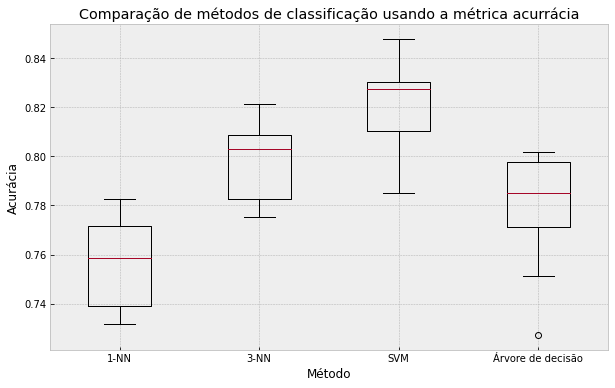

In [123]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(acc_r)
ax.set_xticklabels(['1-NN', '3-NN', 'SVM', 'Árvore de decisão'])
ax.set_xlabel('Método')
ax.set_ylabel('Acurácia')
ax.set_title('Comparação de métodos de classificação usando a métrica acurrácia')
plt.show()
